In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import csv
import numpy as np
import torch.utils.data as D
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [2]:
x = []
y = []

In [3]:
InputFile = open("input_test.csv","r")
InputReader = csv.reader(InputFile)
for item in InputReader:
    # print(item)
    item = [float(i) for i in item]
    # print(item)
    # print(item[1:-1])
    x.append(item)
# print(x)
# 14列

In [4]:

OutputFile = open("output_test.csv","r")
OutputReader = csv.reader(OutputFile)
for item in OutputReader:
    # print(item)
    item = [float(i) for i in item]
    y.append(item)
# print(y)
# 8列

In [5]:
x = np.array(x)
y = np.array(y)

In [6]:
print(x.shape)
print(y.shape)

(25, 21)
(25, 8)


In [7]:
# x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)

# x = torch.FloatTensor([[1.3],[2.1]])
# y = x.pow(2) + 0.2*torch.rand(x.size())

x = torch.FloatTensor(x)
y = torch.FloatTensor(y)
# y = x.pow(2) + 0.2*torch.rand(x.size())

x,y = Variable(x), Variable(y)
# x = Variable(x)

print(x)
print(y)

tensor([[0.0435, 0.0510, 0.0644, 0.0660, 0.0508, 0.0512, 0.0520, 0.0461, 0.0547,
         0.0483, 0.0511, 0.0462, 0.0421, 0.0417, 0.0423, 0.0390, 0.0431, 0.0392,
         0.0345, 0.0355, 0.0119],
        [0.0450, 0.0563, 0.0660, 0.0588, 0.0514, 0.0543, 0.0542, 0.0457, 0.0520,
         0.0487, 0.0454, 0.0492, 0.0453, 0.0460, 0.0464, 0.0437, 0.0435, 0.0407,
         0.0357, 0.0372, 0.0169],
        [0.0170, 0.0189, 0.0234, 0.0210, 0.0202, 0.0190, 0.0193, 0.0165, 0.0192,
         0.0173, 0.0182, 0.0164, 0.0167, 0.0158, 0.0162, 0.0152, 0.0145, 0.0145,
         0.0129, 0.0132, 0.0071],
        [0.0207, 0.0179, 0.0253, 0.0243, 0.0211, 0.0214, 0.0206, 0.0181, 0.0200,
         0.0185, 0.0191, 0.0189, 0.0168, 0.0170, 0.0185, 0.0160, 0.0165, 0.0156,
         0.0140, 0.0141, 0.0064],
        [0.0195, 0.0197, 0.0231, 0.0211, 0.0199, 0.0206, 0.0214, 0.0198, 0.0196,
         0.0180, 0.0192, 0.0183, 0.0170, 0.0168, 0.0175, 0.0162, 0.0162, 0.0151,
         0.0136, 0.0137, 0.0068],
        [0.0208, 0.0

In [8]:
# plt.scatter(x.data.numpy(),y.data.numpy())
# plt.show()

In [9]:
class Net(torch.nn.Module):
   def __init__(self, n_feature, n_hidden, n_output):
       super(Net, self).__init__()
       self.hidden = torch.nn.Linear(n_feature,n_hidden)
       self.predict = torch.nn.Linear(n_hidden,n_output)
   
   def forward(self, x):
       x = F.tanh(self.hidden(x))
    #    x = F.softmax(self.predict(x))
       x = self.predict(x)
       return x

In [10]:
net = Net(21, 20, 8)
print(net)


Net(
  (hidden): Linear(in_features=21, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=8, bias=True)
)


In [11]:
# plt.ion()
# plt.show()

In [23]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.002, weight_decay=0.02)
# optimizer = torch.optim.SGD(net.parameters(), lr=0.002, weight_decay=0.02)
loss_func = nn.MSELoss()

In [24]:
BATCH_SIZE = 25
TRAIN_TIMES = 20000

In [25]:
losslist = []
timelist = []

In [26]:
torch_dataset = D.TensorDataset(x, y)

loader = D.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

for epoch in range(TRAIN_TIMES):
    for step, (batch_x, batch_y) in enumerate(loader):
        
        prediction = net(batch_x)
        loss = loss_func(prediction, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # for test
        if epoch%20 == 0:
            print(loss.data.numpy())

        losslist.append(loss.data.numpy())
        timelist.append(epoch)

7.9132323
7.913227
7.9132195
7.913212
7.913204
7.9131985
7.9131913
7.913183
7.9131756
7.9131703
7.9131627
7.9131556
7.913149
7.913143
7.9131365
7.913129
7.913121
7.9131145
7.9131083
7.913101
7.9130945
7.913089
7.9130797
7.9130726
7.9130664
7.913061
7.913054
7.9130464
7.91304
7.9130335
7.9130273
7.913022
7.913016
7.913008
7.9130025
7.9129963
7.9129915
7.912982
7.9129753
7.91297
7.912964
7.9129567
7.912951
7.9129443
7.912938
7.9129314
7.9129243
7.9129195
7.9129124
7.9129066
7.9128985
7.9128942
7.9128857
7.9128804
7.912874
7.912866
7.9128594
7.912854
7.9128475
7.9128404
7.9128346
7.912829
7.912822
7.9128156
7.912811
7.912803
7.9127975
7.91279
7.9127836
7.9127793
7.912772
7.9127674
7.912761
7.912755
7.912749
7.912743
7.912737
7.912732
7.912724
7.912718
7.9127116
7.912706
7.9127
7.912693
7.9126863
7.912683
7.9126763
7.912672
7.9126635
7.9126587
7.912652
7.9126472
7.912641
7.912635
7.91263
7.9126234
7.9126177
7.912611
7.912605
7.9125996
7.912593
7.912587
7.9125824
7.9125757
7.912571
7.912565

7.9103875
7.9103866
7.910385
7.9103856
7.9103827
7.9103823
7.910381
7.910379
7.910379
7.9103785
7.910377
7.910377
7.9103765
7.9103746
7.910374
7.9103727
7.910372
7.9103703
7.91037
7.9103694
7.910368
7.910367
7.910365
7.910366
7.9103656
7.910364
7.9103627
7.9103627
7.910363
7.910362
7.9103603
7.9103613
7.9103594
7.9103584
7.910356
7.9103575
7.910355
7.9103565
7.9103527
7.910353
7.9103518
7.910351
7.9103527
7.9103503
7.910349
7.910349
7.9103465
7.9103456
7.910344
7.910345
7.910342
7.9103417
7.9103417
7.91034
7.910338
7.910338
7.9103374
7.910337
7.9103355
7.910335
7.9103336
7.9103336
7.910333
7.910332
7.910332
7.910332
7.9103303
7.91033
7.91033
7.9103303
7.910329
7.910328
7.910326
7.9103265
7.9103246
7.9103227
7.9103236
7.910322
7.9103203
7.91032
7.910318
7.910317
7.9103184
7.9103174
7.9103136
7.9103146
7.9103155
7.9103127
7.910311
7.910311
7.9103107
7.910311
7.910311
7.9103093
7.910309
7.9103103
7.9103093
7.9103074
7.910307
7.910306
7.910305
7.910304
7.910304
7.910304
7.9103007
7.9103
7.

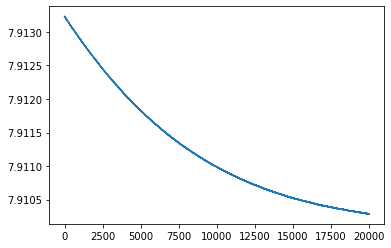

In [27]:
plt.plot(timelist, losslist)

In [28]:
torch.save(net.state_dict(), './model-version-1-args.model')

In [29]:
net = Net(21, 20, 8)
net.load_state_dict(torch.load('./model-version-1-args.model'))

<All keys matched successfully>

In [30]:
print(net)

Net(
  (hidden): Linear(in_features=21, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=8, bias=True)
)


In [31]:
print((net(x)).detach().numpy())
print(y.numpy())

[[45.00675     2.986915   17.331274   12.03624     8.987671   11.921607
   0.47213718  0.22496997]
 [45.0151      2.987505   17.334572   12.03845     8.989304   11.923855
   0.4722347   0.22497989]
 [44.73993     2.9696703  17.225832   11.966394    8.935249   11.850129
   0.46956834  0.22408706]
 [44.753235    2.9705343  17.231081   11.969871    8.937849   11.8536825
   0.4697099   0.22412601]
 [44.749615    2.9703012  17.229641   11.968961    8.937157   11.852693
   0.46967354  0.224128  ]
 [44.759113    2.970916   17.23342    11.97143     8.939011   11.855262
   0.4697607   0.22415154]
 [44.804462    2.9738414  17.251255   11.983295    8.947978   11.8673725
   0.47019878  0.22430141]
 [44.80619     2.9739237  17.251968   11.983788    8.948273   11.867797
   0.47022018  0.22432277]
 [44.7873      2.9727392  17.24454    11.978832    8.944527   11.8628025
   0.47005013  0.22423968]
 [44.76918     2.9715765  17.237381   11.974048    8.940985   11.85797
   0.46986493  0.22416763]
 [44.861

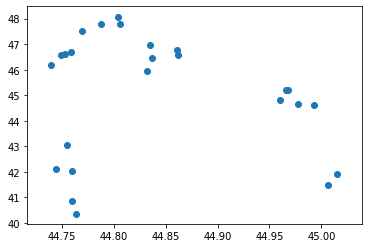

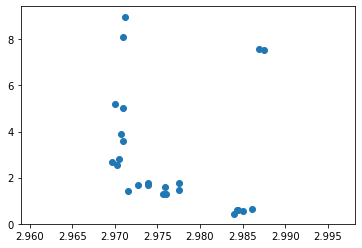

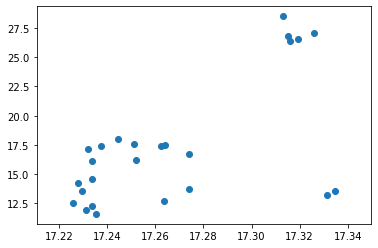

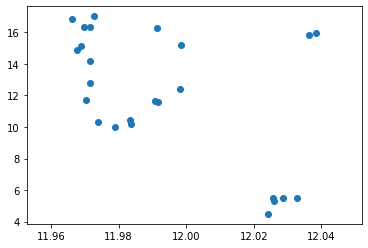

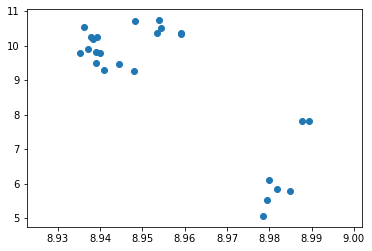

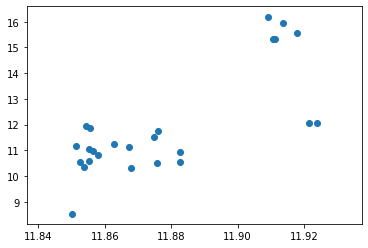

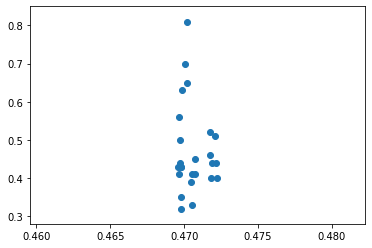

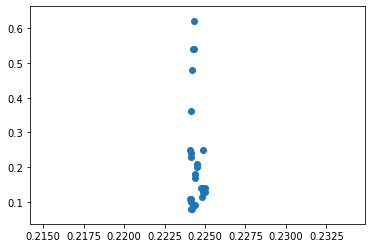

In [32]:
prediction_y_np = (net(x)).detach().numpy()
training_y_np = y.numpy()
plt.ion()
for i in range(8):
    plt.scatter([item[i] for item in prediction_y_np], [item[i] for item in training_y_np])
    plt.pause(1)

In [22]:
# optimizer = torch.optim.SGD(net.parameters(),lr=0.2)
# loss_func = torch.nn.MSELoss()

# for t in range(100):
#     prediction = net(x)

#     loss = loss_func(prediction, y)

#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

#     if t % 5 == 0:
#         plt.cla()
#         plt.scatter(x.data.numpy(),y.data.numpy())
#         plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)
#         plt.text(0.5,0,'Loss=%.4f'%loss.data,fontdict={'size':20,'color':'red'})
#         plt.pause(0.1)

# plt.ioff()
# plt.show()
